In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from graphviz import Digraph

In [5]:
import importlib
import src.micrograd
import src.utils
importlib.reload(src.micrograd)
importlib.reload(src.utils)

from src.micrograd import Value
from src.utils import draw_graph

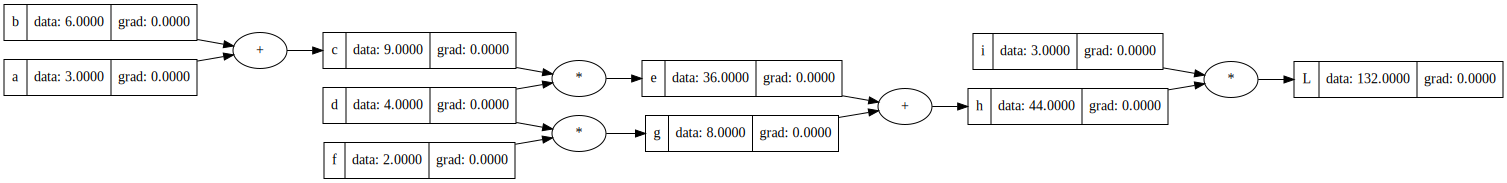

In [6]:
a = Value(3); a.label = 'a'
b = Value(6); b.label = 'b'
c = a + b; c.label = 'c'

d = Value(4); d.label = 'd'
e = c * d; e.label = 'e'

f = Value(2); f.label = 'f'
g = f * d; g.label = 'g'

h = g + e; h.label = 'h'
i = Value(3); i.label = 'i'
L = i * h; L.label = 'L'
draw_graph(L)

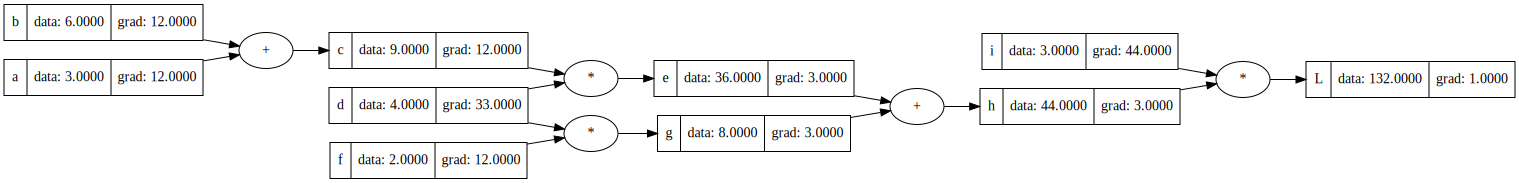

In [7]:
L.backward()
draw_graph(L)

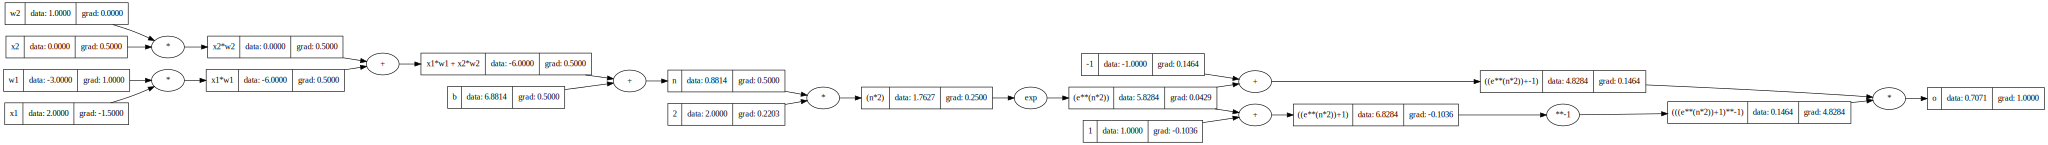

In [8]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# ----
e = (2*n).exp()
o = (e - 1) / (e + 1)
# ----
o.label = 'o'
o.backward()
draw_graph(o)

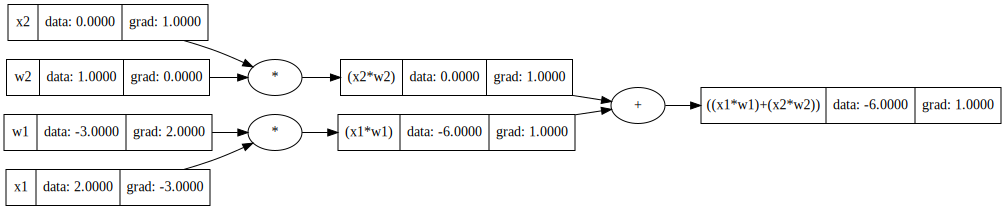

In [21]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1
x2w2 = x2*w2
o = x1w1 + x2w2; 
o.backward()
draw_graph(o)

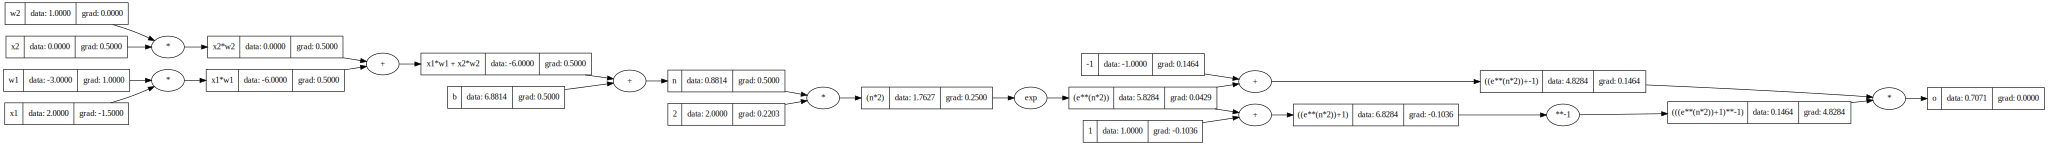

In [9]:
o.zero_grad()
draw_graph(o)

In [11]:
import src.NeuralNetwork
importlib.reload(src.NeuralNetwork)

from src.NeuralNetwork import NeuralNetwork 

In [ ]:
model1 = NeuralNetwork(3, [4, 4, 1])

model = model1

x1 = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]


x = x1

y1 = [1.0, -1.0, -1.0, 1.0]
ys = y1

In [13]:
y_pred = [model(v) for v in x]
y_pred

[Value(data: -0.9733737289704428),
 Value(data: -0.8045130897853877),
 Value(data: -0.1750200637566081),
 Value(data: -0.7285393357281577)]

In [14]:
loss = sum((y_predicted - y_real)**2 for y_real, y_predicted in zip(ys, y_pred))
loss

Value(data: 7.600859136619658)

In [ ]:
params = model.parameters()

for i in range(100):
   # forward pass
   y_pred = [model(v) for v in x]

   # loss calculation
   loss = sum(((y_predicted - y_real)**2 for y_real, y_predicted in zip(ys, y_pred)))

   # gradients calculation
   model.zero_grad()
   loss.backward()

   # weights updata
   for p in params:
      p.data += -0.05 * p.grad
   
   if i%10 == 0:
      print(i, loss.data)

0 7.600859136619658
10 0.21339172474843437
20 0.08739812000636535
30 0.05414381321867802
40 0.039041600629026785
50 0.030463994640716134
60 0.02494866883515476
70 0.0211099352586518
80 0.018286844840247465
90 0.01612479536563275


In [16]:
print("Loss: ", loss.data)

Loss:  0.014571193993225156


In [17]:
y_pred

[Value(data: 0.963476599843044),
 Value(data: -0.9661568233367525),
 Value(data: -0.9122726740732057),
 Value(data: 0.9336992389691171)]